# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

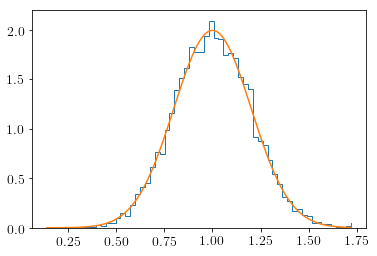

In [20]:
# Problem 2
# Generate a sample of 10,000 data values drawn from N(μ=1.0, σ=0.2) and 
# draw a pretty histogram, with the bin size determined using the 
# Freedman-Diaconis rule. 
# Show (Poissonian) uncertainty for each histogram value, and 
# overplot the true distribution. 
stdDev = 0.2
mean = 1.0
sampleSize = 10_000
population = norm(mean, stdDev)
sampleArr = population.rvs(sampleSize)

binSize = 2.7*sigmaG(sampleArr)/(sampleSize**(1/3))
bins = np.append(np.arange(start=sampleArr.min(), stop=sampleArr.max(),step=binSize),
                  sampleArr.max())

# plot
plt.hist(sampleArr, bins, histtype='step', density=True)
# _ = fancyhist(sampleArr, bins="freedman", histtype="step")

# overplot true

xRangeArr = np.linspace(sampleArr.min(), sampleArr.max(), sampleSize)
pdfArr = population.pdf(xRangeArr)
plt.plot(xRangeArr, pdfArr)
#print(sigmaG(sample))

 

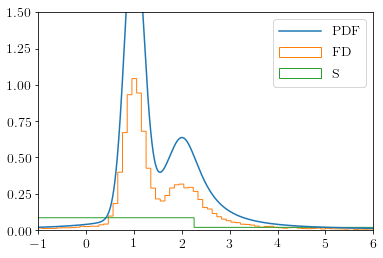

In [6]:
# prob 3
# Repeat the problem 2, but now add to the Gaussian sample 
# (concatenate arrays with np.concatenate()) another sample 
# of 10,000 data values drawn from a cauchy distribution with 
# μ=2.0 and γ=0.5. Do it twice: once with the bin size determined 
# using the Freedman-Diaconis rule and once using the Scott's rule. 
# Comment. 

# deps
sampleSize = 10_000
xLow = -1
xHigh = 6

# Norm
stdDev = 0.2
mean = 1.0
populationNorm = norm(mean, stdDev)
sampleNormArr = populationNorm.rvs(sampleSize)


# Cauchy
mu = 2.0
gamma = 0.5
populationCauchy = cauchy(mu, gamma)
sampleCauchyArr = populationCauchy.rvs(sampleSize)

### Together
fullSampleArr = np.concatenate([sampleNormArr, sampleCauchyArr])

# PDFs
xRangeArr = np.linspace(xLow, xHigh, 
                        sampleSize)
pdfNormArr = populationNorm.pdf(xRangeArr)
pdfCauchyArr = populationCauchy.pdf(xRangeArr)
fullPdfArr = pdfNormArr + pdfCauchyArr
plt.plot(xRangeArr, fullPdfArr, label='PDF')

### plot

# histogram with F-D rule:
binSizeFD = 2.7*sigmaG(fullSampleArr)/(sampleSize**(1/3))
binsFD = np.append(np.arange(start=fullSampleArr.min(), stop=fullSampleArr.max(),
                           step=binSizeFD),
                  fullSampleArr.max())

plt.hist(fullSampleArr, binsFD, histtype='step', density=True, label='FD')

# histogram with scott's rule
stdDev = np.std(fullSampleArr)
binSizeS = 3.5*stdDev/(sampleSize**(1/3))
binsS = np.append(np.arange(start=fullSampleArr.min(), stop=fullSampleArr.max(),
                            step=binSizeS),
                  fullSampleArr.max())

plt.hist(fullSampleArr, binsS, histtype='step', density=True, label='S')

# overplot true PDF

plt.xlim(xLow,xHigh)
plt.ylim(0,1.5)
plt.legend(loc='best')


The bins made with Scott's rule (S) are much more affected by the width of the Cauchy distribution than that made with the Freedman-Diaconis rule (FD). The latter's bins much more closely represent the true PDF, though not as much as in problem 1.

Text(0, 0.5, 'pdf')

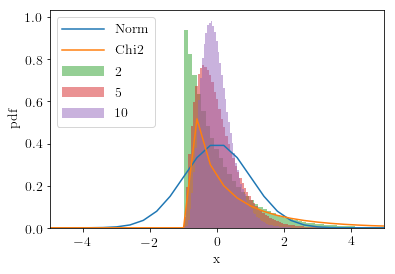

In [12]:
# prob 3

# Follow the example from the Central Limit Theorem cells in 
# BasicStats2.ipynb and simulate the distribution of 1,000,000 𝒩(0,1) 
#draws of χ2 for N=2 and N=5. Overplot the theoretical pdf 
# (it will help to use scipy.special.gamma()).

N=2 # Number of draws
mu=0 # Location
sigma =1  # Scale factor
degFreedom = 1 # Required argument, so guessed

u = np.linspace(-200, 200, 1000)#0,200,1000) # Array to sample the space
dist = norm(mu,sigma) # Complete
plt.plot(u,dist.pdf(u),label='Norm') # Complete

from scipy.stats import chi2
popChi2 = chi2(1, loc=-1, scale=1) # loc=-1 since Chi2 is right-heavy.

plt.plot(u,popChi2.pdf(u), label='Chi2')

# Add a histogram that is the mean of 1,000,000 draws
for N in (2,5,10): # 10 shows better Gaussain Shape than 5.
    yy = []
    for i in np.arange(1_000_000):
        xx = popChi2.rvs(N) # N random draws
        yy.append(np.mean(xx)) # Append average of those random draws to the end of the array
        
    _ = plt.hist(yy,bins=100,histtype='stepfilled', 
                 alpha=0.5, density=True, label=str(N))

plt.xlim(-5,5)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('pdf')


One can see that a Gaussian-like shape, narrow as it is, is being approached as the number of random draws from the chi-squared distribution increases.